In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/12aeb6a8af2d5cdf500e55d3ccbb9f8e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/insurance.zip')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Исследование данных

In [3]:
print(data.shape)

(1338, 7)


In [4]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

- гистограммы/коробчатые диаграммы числовых признаков;
- столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
- диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).

### Кодирование категориальных признаков

In [7]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


### Подготовка выборок для моделирования

In [8]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [9]:
# Задание 6.1 Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20.
# Воспользуйтесь функцией train_test_split.В качестве значения параметра random_state укажите число 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape

(268, 9)

In [10]:
(X_train.shape, y_train.shape)

((1070, 9), (1070,))

In [11]:
# Задание 6.2 Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных.
# Все параметры оставьте по умолчанию. Чему равен свободный член (intercept) обученной модели?

model_lr = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
model_lr.fit(X_train, y_train)

model_lr.intercept_.round(3)

-12390.804

In [12]:
#Задание 6.3 С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке.
# Рассчитайте следующие три метрики: R^2, MAE, MAPE.

#Делаем предсказание на тренировочной выборке
train_predict_lr = model_lr.predict(X_train)
#Рассчитываем MAE
print('MAE score train: {:.0f}'.format(metrics.mean_absolute_error(y_train, train_predict_lr)))
#Рассчитываем MAPE
print('MAPE score train: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, train_predict_lr) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score train: {:.3f}'.format(metrics.r2_score(y_train, train_predict_lr)))
print()
#Делаем предсказание на тестовой выборке
test_predict_lr = model_lr.predict(X_test)
#Рассчитываем MAE
print('MAE score test: {:.0f}'.format(metrics.mean_absolute_error(y_test, test_predict_lr)))
#Рассчитываем MAPE
print('MAPE score test: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, test_predict_lr) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score test: {:.3f}'.format(metrics.r2_score(y_test, test_predict_lr)))

MAE score train: 4208
MAPE score train: 42 %
R2 score train: 0.742

MAE score test: 4181
MAPE score test: 47 %
R2 score test: 0.784


### Оценка качества модели

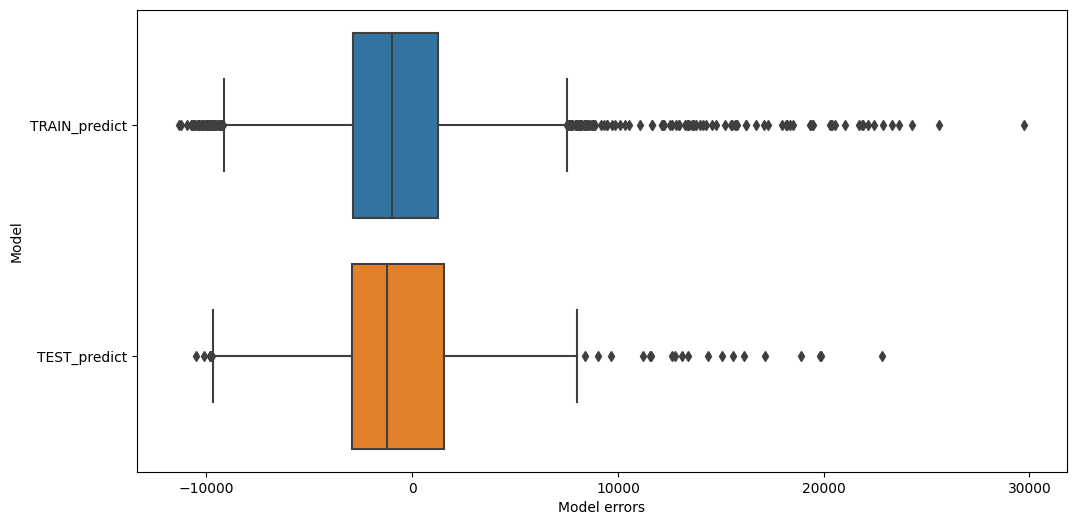

In [13]:
#Задание 6.4 Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и 
# тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием

#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_train = y_train - train_predict_lr
#Ошибки модели на всех факторах
y_errors_test = y_test - test_predict_lr
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'TRAIN_predict': y_errors_train, 
     'TEST_predict': y_errors_test
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

### Масштабирование и создание полиномиальных признаков

In [14]:
# Задание 6.5 Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler).
# Расчёт параметров нормализации (fit) произведите на тренировочной выборке.
# Min-max-нормализация в отличие от стандартизации не искажает изначальный вид бинарных категориальных признаков
# На нормализованных данных сгенерируйте полиномиальные признаки степени 2, параметр include_bias=False.

#Инициализируем стандартизатор MinMaxScaler
scaler = preprocessing.MinMaxScaler()
#Производим стандартизацию
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Составляем DataFrame из результатов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(1070, 54)
(268, 54)


### Полиноминальная модель

In [15]:
# Задание 6.6 Обучите модель линейной регрессии на полиномиальных признаках. Чему равно значение метрики R^2
# на тестовой выборке?

#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
 
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.842
Test R^2: 0.866


In [16]:
# Задание 6.7 Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.
lr_model_poly.coef_

array([ 3.84183860e+16, -2.01215933e+15, -1.00910479e+16,  1.10996125e+16,
        7.14339387e+15, -7.95852089e+15, -1.08955515e+17, -2.28938167e+16,
       -4.56272126e+16,  8.37600000e+03,  8.84000000e+02,  1.06000000e+03,
       -1.63600000e+03,  2.26000000e+02, -3.84183860e+16, -3.84183860e+16,
       -3.84183860e+16, -3.84183860e+16, -1.08266479e+16,  6.70750000e+02,
       -1.26512500e+03,  2.73750000e+02,  1.28388073e+16,  1.28388073e+16,
        1.28388073e+16,  1.28388073e+16, -9.77418750e+03,  1.57512500e+03,
        5.48298594e+04,  1.00910479e+16,  1.00910479e+16,  1.00910479e+16,
        1.00910479e+16, -2.08000000e+03, -2.19600000e+03, -1.10996125e+16,
       -1.10996125e+16, -1.10996125e+16, -1.10996125e+16, -1.62449868e+16,
        9.10159294e+15,  9.10159294e+15,  9.10159294e+15,  9.10159294e+15,
       -2.07456337e+16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.02513608e+16,  0.00000000e+00,  0.00000000e+00, -5.81033785e+15,
        0.00000000e+00,  

### Регуляризация

#### L1-Lasso

In [26]:
%%time
# Задание 6.8 Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках.
# В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.
# Чему равны метрики R^2, MAE, MAPE на тестовой выборке?

#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_l1 = lasso_lr.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_l1 = lasso_lr.predict(X_test_poly)
#Рассчитываем MAE
print('MAE score train: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_l1)))
#Рассчитываем MAPE
print('MAPE score train: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_l1) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score train: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_l1)))
print()
#Рассчитываем MAE
print('MAE score test: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_l1)))
#Рассчитываем MAPE
print('MAPE score test: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_l1) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score test: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_l1)))

MAE score train: 2890
MAPE score train: 29 %
R2 score train: 0.842

MAE score test: 2719
MAPE score test: 30 %
R2 score test: 0.867
CPU times: total: 172 ms
Wall time: 169 ms


In [46]:
lasso_lr.coef_

array([ 3.24221653e+03, -4.92313816e+02,  5.07612317e+03,  4.58362056e+03,
        1.97928569e+03,  1.88025707e+02, -4.70775218e+02,  5.83657101e+02,
       -2.43543456e+02,  8.29826751e+03,  7.74581954e+02,  8.44448593e+02,
       -1.20775688e+03,  1.34809915e+02, -1.04309726e+03, -0.00000000e+00,
        1.16964229e+03,  1.61765564e+03, -0.00000000e+00,  5.05847740e+02,
       -1.13425152e+03,  2.65796922e+02, -1.22240479e+03,  0.00000000e+00,
        2.36213242e+02, -5.80031340e+02, -8.17963257e+03,  1.29487768e+03,
        5.47148553e+04,  3.58531873e+03,  2.40690210e+03, -9.63549427e+02,
        0.00000000e+00, -1.67464337e+03, -2.05436459e+03,  1.94204864e+03,
        1.95394442e+03, -0.00000000e+00, -1.06364416e+03,  8.00606774e+00,
        5.93688978e+02, -0.00000000e+00, -2.30643423e+02,  1.97933477e+03,
        6.31615519e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

#### L2-Ridge

In [45]:
# Задание 6.9 Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. Значение alpha по умолчанию.
# Чему равны метрики R^2, MAE, MAPE на тестовой выборке?

#Создаём объект класса линейной регрессии с L1-регуляризацией
ridge_lr = linear_model.Ridge()
#Обучаем модель
ridge_lr.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_l2 = ridge_lr.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_l2 = ridge_lr.predict(X_test_poly)
#Рассчитываем MAE
print('MAE score train: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict_l2)))
#Рассчитываем MAPE
print('MAPE score train: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict_l2) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score train: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_l2)))
print()
#Рассчитываем MAE
print('MAE score test: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict_l2)))
#Рассчитываем MAPE
print('MAPE score test: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_l2) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score test: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_l2)))

MAE score train: 2949
MAPE score train: 30 %
R2 score train: 0.839

MAE score test: 2861
MAPE score test: 31 %
R2 score test: 0.863
